<a href="https://colab.research.google.com/github/prachuryaphukan/NBA-MVP-Analytics-and-Prediction/blob/main/NBA_MVP_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping NBA Data
##Scraping different tables from the site www.basketball-reference.com using the BeautifulSoup library for analysis of NBA Data

Prachurya Phukan

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import time

# create a function to scrape team performance for multiple years
def scrape_NBA_team_data(years = [2017, 2018]):

    # Initialize an empty list to store yearly dataframes
    all_years_data = []

    # loop through each year
    for y in years:
        # NBA season to scrape
        year = y

        # URL to scrape, notice f string:
        url = f"https://www.basketball-reference.com/leagues/NBA_{year}_standings.html"

        # collect HTML data
        html = urlopen(url)

        # create beautiful soup object from HTML
        soup = BeautifulSoup(html, features="lxml")

        # use getText()to extract the headers into a list
        titles = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]

        # first, find only column headers
        headers = titles[1:titles.index("SRS")+1]

        # then, exclude first set of column headers (duplicated)
        titles = titles[titles.index("SRS")+1:]

        # next, row titles (ex: Boston Celtics, Toronto Raptors)
        try:
            row_titles = titles[0:titles.index("Eastern Conference")]
        except: row_titles = titles
        # remove the non-teams from this list
        for i in headers:
            row_titles.remove(i)
        row_titles.remove("Western Conference")
        divisions = ["Atlantic Division", "Central Division",
                     "Southeast Division", "Northwest Division",
                     "Pacific Division", "Southwest Division",
                     "Midwest Division"]
        for d in divisions:
            try:
                row_titles.remove(d)
            except:
                print("no division:", d)

        # next, grab all data from rows (avoid first row)
        rows = soup.findAll('tr')[1:]
        team_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]
        # remove empty elements
        team_stats = [e for e in team_stats if e != []]
        # only keep needed rows
        team_stats = team_stats[0:len(row_titles)]

        # add team name to each row in team_stats
        for i in range(0, len(team_stats)):
            team_stats[i].insert(0, row_titles[i])
            team_stats[i].insert(0, year)

        # add team, year columns to headers
        headers.insert(0, "Team")
        headers.insert(0, "Year")

        # create a dataframe with all aquired info
        year_standings = pd.DataFrame(team_stats, columns = headers)

        # add a column to dataframe to indicate playoff appearance
        year_standings["Playoffs"] = ["Y" if "*" in ele else "N" for ele in year_standings["Team"]]
        # remove * from team names
        year_standings["Team"] = [ele.replace('*', '') for ele in year_standings["Team"]]
        # add losing season indicator (win % < .5)
        year_standings["Losing_season"] = ["Y" if float(ele) < .5 else "N" for ele in year_standings["W/L%"]]

        # Append the yearly dataframe to the list
        all_years_data.append(year_standings)
        time.sleep(5)

    # Concatenate all yearly dataframes into a single dataframe
    final_df = pd.concat(all_years_data, ignore_index=True)

    # print final_df
    print(final_df.info)
    # export to csv
    final_df.to_csv("nba_team_data.csv", index=False)

In [ ]:
scrape_NBA_team_data(years = [1994,
                              1995, 1996, 1997, 1998, 1999,
                              2000, 2001, 2002, 2003, 2004,
                              2005, 2006, 2007, 2008, 2009,
                              2010, 2011, 2012, 2013, 2014,
                              2015, 2016, 2017, 2018, 2019,
                              2020, 2021, 2022, 2023,2024])

no division: Southeast Division
no division: Northwest Division
no division: Southwest Division
no division: Southeast Division
no division: Northwest Division
no division: Southwest Division
no division: Southeast Division
no division: Northwest Division
no division: Southwest Division
no division: Southeast Division
no division: Northwest Division
no division: Southwest Division
no division: Southeast Division
no division: Northwest Division
no division: Southwest Division
no division: Southeast Division
no division: Northwest Division
no division: Southwest Division
no division: Southeast Division
no division: Northwest Division
no division: Southwest Division
no division: Southeast Division
no division: Northwest Division
no division: Southwest Division
no division: Southeast Division
no division: Northwest Division
no division: Southwest Division
no division: Southeast Division
no division: Northwest Division
no division: Southwest Division
no division: Southeast Division
no divis

In [ ]:
import os

current_directory = os.getcwd()
print(current_directory)

/content


In [ ]:
df = pd.read_csv('nba_team_data.csv')

# Clean the 'GB' column
df['GB'] = df['GB'].replace('—', '0')
df['GB'] = pd.to_numeric(df['GB'], errors='coerce')

# Convert 'Playoffs' and 'Losing_season' to boolean
df['Playoffs'] = df['Playoffs'].map({'Y': True, 'N': False})
df['Losing_season'] = df['Losing_season'].map({'Y': True, 'N': False})

# Standardize team names (remove any trailing spaces)
df['Team'] = df['Team'].str.strip()

# Check for any missing values
print("Missing values:")
print(df.isnull().sum())

# Display the updated info of the dataframe
print("\nUpdated DataFrame Info:")
print(df.info())

# Display the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(df.head())

# Save the cleaned dataset
df.to_csv('cleaned_nba_team_data.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_nba_team_data.csv'")

Missing values:
Year             0
Team             0
W                0
L                0
W/L%             0
GB               0
PS/G             0
PA/G             0
SRS              0
Playoffs         0
Losing_season    0
dtype: int64

Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           915 non-null    int64  
 1   Team           915 non-null    object 
 2   W              915 non-null    int64  
 3   L              915 non-null    int64  
 4   W/L%           915 non-null    float64
 5   GB             915 non-null    float64
 6   PS/G           915 non-null    float64
 7   PA/G           915 non-null    float64
 8   SRS            915 non-null    float64
 9   Playoffs       915 non-null    bool   
 10  Losing_season  915 non-null    bool   
dtypes: bool(2), float64(5), int64(3), object(1)
memory usag

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage to scrape
url = 'https://www.basketball-reference.com/leagues/NBA_2024_per_game.html'

# Send a GET request to the webpage
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table with the player stats
table = soup.find('table', {'id': 'per_game_stats'})

# Extract the headers
headers = [th.getText() for th in table.find_all('th')[1:30]]

# Extract the rows
rows = table.find_all('tr')[1:]

# Extract the data from each row
player_stats = []
for row in rows:
    cols = row.find_all('td')
    if len(cols) > 0:
        player_stats.append([col.getText() for col in cols])

# Create a DataFrame
df = pd.DataFrame(player_stats, columns=headers)

# Save the DataFrame to a CSV file
csv_filename = 'nba_2024_per_game_stats.csv'
df.to_csv(csv_filename, index=False)

print('Data scraped and saved to ' + csv_filename)

Data scraped and saved to nba_2024_per_game_stats.csv


In [ ]:
from tqdm import tqdm

def scrape_nba_stats(year):
    url = f'https://www.basketball-reference.com/leagues/NBA_{year}_per_game.html'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table', {'id': 'per_game_stats'})

    headers = [th.getText() for th in table.find_all('th')[1:30]]
    rows = table.find_all('tr')[1:]

    player_stats = []
    for row in rows:
        cols = row.find_all('td')
        if len(cols) > 0:
            stats = [col.getText() for col in cols]
            stats.append(str(year))  # Add the year as a new column
            player_stats.append(stats)

    return headers + ['Year'], player_stats

# Scrape data for years 1991-2024
all_stats = []
years = range(1994, 2025)

for year in tqdm(years, desc="Scraping NBA stats"):
    headers, stats = scrape_nba_stats(year)
    all_stats.extend(stats)

# Create DataFrame
df = pd.DataFrame(all_stats, columns=headers)

# Save to CSV
csv_filename = 'nba_stats_1991_2024.csv'
df.to_csv(csv_filename, index=False)

print(f'Data scraped and saved to {csv_filename}')
print(f'Total number of entries: {len(df)}')
print(df.head())
print(df.dtypes)

Scraping NBA stats:   0%|          | 0/31 [00:00<?, ?it/s]


AttributeError: 'NoneType' object has no attribute 'find_all'

In [ ]:
import shutil

folder_name = "mvp"
os.makedirs(folder_name, exist_ok=True)

# Verify that the folder was created
os.listdir()

years = list(range(1991,2022))
url_start = "https://www.basketball-reference.com/awards/awards_{}.html"

for year in years:
    url = url_start.format(year)

    data = requests.get(url)

    with open("mvp/{}.html".format(year), "w+") as f:
        f.write(data.text)

with open("mvp/1991.html") as f:
    page = f.read()

soup = BeautifulSoup(page, 'html.parser')
soup.find('tr', class_="over_header").decompose()
mvp_table = soup.find_all(id="mvp")[0]
import pandas as pd
mvp_1991 = pd.read_html(str(mvp_table))[0]



<ipython-input-8-941a875efb4b>:27: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_1991 = pd.read_html(str(mvp_table))[0]


In [ ]:
"""
# Create folder for storing HTML files
folder_name = "mvp"
os.makedirs(folder_name, exist_ok=True)

years = list(range(1994, 2025))
url_start = "https://www.basketball-reference.com/awards/awards_{}.html"

# Initialize an empty list to store data from each year
all_mvp_data = []

# Loop through each year, download the HTML, and extract data
for year in years:
    url = url_start.format(year)
    data = requests.get(url)

    # Save the HTML to a file
    with open(f"{folder_name}/{year}.html", "w+") as f:
        f.write(data.text)

    # Parse the HTML file
    with open(f"{folder_name}/{year}.html") as f:
        page = f.read()

    soup = BeautifulSoup(page, 'html.parser')

    # Check if table exists
    mvp_table = soup.find('table', id="mvp")
    if mvp_table:
        mvp_df = pd.read_html(str(mvp_table))[0]
        mvp_df['Year'] = year  # Add a column for the year
        all_mvp_data.append(mvp_df)  # Append to the list
        print(f"MVP data found and parsed for year {year}")
    else:
        print(f"MVP table not found for year {year}.")
        # Optional: Print part of the page content for inspection
        print(f"--- {year} HTML Content Snippet ---")
        print(soup.prettify()[:2000])  # Print the first 2000 characters

# Combine all the dataframes into a single dataframe if any were found
if all_mvp_data:
    combined_mvp_data = pd.concat(all_mvp_data, ignore_index=True)
    # Save the combined dataframe to a CSV file
    combined_mvp_data.to_csv("combined_mvp_data_1991_2024.csv", index=False)
    print("Combined data saved to 'combined_mvp_data_1991_2024.csv'.")
else:
    print("No MVP data found for any year.")"""

MVP table not found for year 1994.
--- 1994 HTML Content Snippet ---
<!DOCTYPE html>
<html class="no-js" data-root="" data-version="klecko-" lang="en">
 <head id="suppress_all_ads">
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
   <title>
    Rate Limited Request (429 error) | Sports-Reference.com
   </title>
   <link href="https://www.sports-reference.com/429.html" rel="canonical"/>
   <!-- CSS start -->
   <style>
    body,html{color:#000;font:14px/1.25 Helvetica Neue,helvetica,arial,sans-serif;margin:0;padding:0}html:not(.backstop){scroll-behavior:smooth}html:not(.backstop) div,html:not(.backstop) span{scroll-snap-margin:2.5em 0 0 0;scroll-margin:2.5em 0 0 0}body{-webkit-text-size-adjust:none;-moz-text-size-adjust:none;-ms-text-size-adjust:none;background:#c9cbcd;position:relative;z-index:0}a img{border:0}li,ol,ul{list-style-type:none;margin:0;padding:0}ta

In [ ]:
folder_name = "mvp"
os.makedirs(folder_name, exist_ok=True)

years = list(range(1994, 2025))
url_start = "https://www.basketball-reference.com/awards/awards_{}.html"

# Initialize an empty list to store data from each year
all_mvp_data = []

# Loop through each year, download the HTML, and extract data
for year in years:
    url = url_start.format(year)
    data = requests.get(url)

    # Save the HTML to a file
    with open(f"{folder_name}/{year}.html", "w+") as f:
        f.write(data.text)

    # Parse the HTML file
    with open(f"{folder_name}/{year}.html") as f:
        page = f.read()

    soup = BeautifulSoup(page, 'html.parser')

    # Debugging step: Print out the table IDs in the page
    tables = soup.find_all('table')
    table_ids = [table.get('id') for table in tables]
    print(f"Available table IDs for year {year}: {table_ids}")

    # Adjust this according to the actual ID or other identifying attributes of the MVP table
    mvp_table = soup.find('table', id="mvp")  # Adjust if needed
    if mvp_table:
        mvp_df = pd.read_html(str(mvp_table))[0]
        mvp_df['Year'] = year  # Add a column for the year
        all_mvp_data.append(mvp_df)  # Append to the list
        print(f"MVP data found and parsed for year {year}")
    else:
        print(f"MVP table not found for year {year}.")
        # Optional: Print part of the page content for inspection
        print(f"--- {year} HTML Content Snippet ---")
        print(soup.prettify()[:2000])  # Print the first 2000 characters

# Combine all the dataframes into a single dataframe if any were found
if all_mvp_data:
    combined_mvp_data = pd.concat(all_mvp_data, ignore_index=True)
    # Save the combined dataframe to a CSV file
    combined_mvp_data.to_csv("combined_mvp_data_1991_2024.csv", index=False)
    print("Combined data saved to 'combined_mvp_data_1991_2024.csv'.")
else:
    print("No MVP data found for any year.")

Available table IDs for year 1994: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 1994


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 1995: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 1995


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 1996: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 1996


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 1997: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 1997


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 1998: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 1998


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 1999: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 1999


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2000: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2000


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2001: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2001


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2002: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2002


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2003: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2003


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2004: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2004


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2005: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2005


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2006: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2006


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2007: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2007


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2008: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2008


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2009: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2009


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2010: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2010


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2011: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2011


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2012: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2012


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2013: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2013


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2014: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2014


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2015: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2015


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2016: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2016


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2017: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2017


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2018: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2018


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2019: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2019


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2020: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2020


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2021: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2021


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2022: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2022


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


Available table IDs for year 2023: ['mvp', 'roy', 'leading_all_nba', 'leading_all_defense', 'leading_all_rookie']
MVP data found and parsed for year 2023
Available table IDs for year 2024: []
MVP table not found for year 2024.
--- 2024 HTML Content Snippet ---


<ipython-input-5-ec3308adc711>:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mvp_df = pd.read_html(str(mvp_table))[0]


<!DOCTYPE html>
<html class="no-js" data-root="" data-version="klecko-" lang="en">
 <head id="suppress_all_ads">
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
   <title>
    Rate Limited Request (429 error) | Sports-Reference.com
   </title>
   <link href="https://www.sports-reference.com/429.html" rel="canonical"/>
   <!-- CSS start -->
   <style>
    body,html{color:#000;font:14px/1.25 Helvetica Neue,helvetica,arial,sans-serif;margin:0;padding:0}html:not(.backstop){scroll-behavior:smooth}html:not(.backstop) div,html:not(.backstop) span{scroll-snap-margin:2.5em 0 0 0;scroll-margin:2.5em 0 0 0}body{-webkit-text-size-adjust:none;-moz-text-size-adjust:none;-ms-text-size-adjust:none;background:#c9cbcd;position:relative;z-index:0}a img{border:0}li,ol,ul{list-style-type:none;margin:0;padding:0}table td,table th{border:0}iframe{max-width:100%}code{background:#eee}a

In [ ]:
mvps = pd.read_csv("combined_mvp_data_1991_2024.csv")
mvps



,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Hakeem Olajuwon,31,HOU,66,889,1010,0.880,80,41.0,...,11.9,3.6,1.6,3.7,0.528,0.421,0.716,14.3,0.210,1994
1,2,David Robinson,28,SAS,24,730,1010,0.723,80,40.5,...,10.7,4.8,1.7,3.3,0.507,0.345,0.749,20.0,0.296,1994
2,3,Scottie Pippen,28,CHI,7,390,1010,0.386,72,38.3,...,8.7,5.6,2.9,0.8,0.491,0.320,0.660,11.2,0.194,1994
3,4,Shaquille O'Neal,21,ORL,3,289,1010,0.286,81,39.8,...,13.2,2.4,0.9,2.9,0.599,0.000,0.554,16.9,0.252,1994
4,5,Patrick Ewing,31,NYK,1,255,1010,0.252,79,37.6,...,11.2,2.3,1.1,2.7,0.496,0.286,0.765,13.1,0.211,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,5,Jalen Brunson,27,NYK,0,142,990,0.143,77,35.4,...,3.6,6.7,0.9,0.2,0.479,0.401,0.847,11.2,0.198,2024
453,6,Jayson Tatum,25,BOS,0,86,990,0.087,74,35.7,...,8.1,4.9,1.0,0.6,0.471,0.376,0.833,10.4,0.189,2024
454,7,Anthony Edwards,22,MIN,0,18,990,0.018,79,35.1,...,5.4,5.1,1.3,0.5,0.461,0.357,0.836,7.5,0.130,2024
455,8,Domantas Sabonis,27,SAC,0,3,990,0.003,82,35.7,...,13.7,8.2,0.9,0.6,0.594,0.379,0.704,12.6,0.206,2024


In [ ]:
row_178 = mvps.iloc[242]  # Indexing starts at 0, so the 178th row is at index 177
print(row_178)

Rank                   10
Player     Manu GinÃ³bili
Age                    30
Tm                    SAS
First                   0
Pts Won                 9
Pts Max              1260
Share               0.007
G                      74
MP                   31.1
PTS                  19.5
TRB                   4.8
AST                   4.5
STL                   1.5
BLK                   0.4
FG%                  0.46
3P%                 0.401
FT%                  0.86
WS                   11.1
WS/48               0.232
Year                 2008
Name: 242, dtype: object


In [ ]:
mvps["Player"] = mvps["Player"].str.replace("Ã³","o", regex=False)
mvps["Player"] = mvps["Player"].str.replace("Ä","c", regex=False)
mvps["Player"] = mvps["Player"].str.replace("Ä","c", regex=False)
mvps["Player"] = mvps["Player"].str.replace("ć","c", regex=False)
mvps["Player"] = mvps["Player"].str.replace("ó","o", regex=False)
mvps["Player"] = mvps["Player"].str.replace("*","", regex=False)
mvps["Player"] = mvps["Player"].str.replace("Ä","c", regex=False)
mvps["Player"] = mvps["Player"].str.replace("č","c", regex=False)
mvps.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Hakeem Olajuwon,31,HOU,66,889,1010,0.880,80,41.0,...,11.9,3.6,1.6,3.7,0.528,0.421,0.716,14.3,0.210,1994
1,2,David Robinson,28,SAS,24,730,1010,0.723,80,40.5,...,10.7,4.8,1.7,3.3,0.507,0.345,0.749,20.0,0.296,1994
2,3,Scottie Pippen,28,CHI,7,390,1010,0.386,72,38.3,...,8.7,5.6,2.9,0.8,0.491,0.320,0.660,11.2,0.194,1994
3,4,Shaquille O'Neal,21,ORL,3,289,1010,0.286,81,39.8,...,13.2,2.4,0.9,2.9,0.599,0.000,0.554,16.9,0.252,1994
4,5,Patrick Ewing,31,NYK,1,255,1010,0.252,79,37.6,...,11.2,2.3,1.1,2.7,0.496,0.286,0.765,13.1,0.211,1994


In [ ]:
mvps = mvps[["Player", "Year", "Pts Won", "Pts Max", "Share"]]
mvps.head()

,Player,Year,Pts Won,Pts Max,Share
0,Hakeem Olajuwon,1994,889,1010,0.880
1,David Robinson,1994,730,1010,0.723
2,Scottie Pippen,1994,390,1010,0.386
3,Shaquille O'Neal,1994,289,1010,0.286
4,Patrick Ewing,1994,255,1010,0.252


In [ ]:

players = pd.read_csv("nba_stats_1991_2024.csv")

In [ ]:
players

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,25,BOS,13,0,12.2,1.8,4.2,0.436,...,0.9,2.6,3.5,0.2,0.2,0.2,1.3,1.5,4.9,1994
1,Mahmoud Abdul-Rauf,PG,24,DEN,80,78,32.7,7.4,16.0,0.460,...,0.3,1.8,2.1,4.5,1.0,0.1,1.9,1.9,18.0,1994
2,Michael Adams,PG,31,WSB,70,67,33.4,4.1,10.0,0.408,...,0.5,2.1,2.6,6.9,1.4,0.1,2.4,2.0,12.1,1994
3,Mark Aguirre,SF,34,LAC,39,0,22.0,4.2,8.9,0.468,...,0.7,2.3,3.0,2.7,0.5,0.2,1.8,2.5,10.6,1994
4,Danny Ainge,SG,34,PHO,68,1,22.9,3.3,7.9,0.417,...,0.4,1.5,1.9,2.6,0.8,0.1,1.2,2.1,8.9,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,0.524,...,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3,2024
18260,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,0.430,...,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7,2024
18261,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,0.538,...,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6,2024
18262,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,0.419,...,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8,2024


In [ ]:
idx = players.iloc[14859]  # Indexing starts at 0, so the 178th row is at index 177
print(idx)

Player    Luka Dončić
Pos                PG
Age                20
Tm                DAL
G                  61
GS                 61
MP               33.6
FG                9.5
FGA              20.6
FG%             0.463
3P                2.8
3PA               8.9
3P%             0.316
2P                6.7
2PA              11.7
2P%             0.574
eFG%            0.531
FT                7.0
FTA               9.2
FT%             0.758
ORB               1.3
DRB               8.1
TRB               9.4
AST               8.8
STL               1.0
BLK               0.2
TOV               4.3
PF                2.5
PTS              28.8
Year             2020
Name: 14859, dtype: object


In [ ]:
players["Player"] = players["Player"].str.replace("Ã³","o", regex=False)
players["Player"] = players["Player"].str.replace("Ä","c", regex=False)
players["Player"] = players["Player"].str.replace("Ä","c", regex=False)
players["Player"] = players["Player"].str.replace("ć","c", regex=False)
players["Player"] = players["Player"].str.replace("ó","o", regex=False)
players["Player"] = players["Player"].str.replace("*","", regex=False)
players["Player"] = players["Player"].str.replace("Ä","c", regex=False)
players["Player"] = players["Player"].str.replace("č","c", regex=False)
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,25,BOS,13,0,12.2,1.8,4.2,0.436,...,0.9,2.6,3.5,0.2,0.2,0.2,1.3,1.5,4.9,1994
1,Mahmoud Abdul-Rauf,PG,24,DEN,80,78,32.7,7.4,16.0,0.460,...,0.3,1.8,2.1,4.5,1.0,0.1,1.9,1.9,18.0,1994
2,Michael Adams,PG,31,WSB,70,67,33.4,4.1,10.0,0.408,...,0.5,2.1,2.6,6.9,1.4,0.1,2.4,2.0,12.1,1994
3,Mark Aguirre,SF,34,LAC,39,0,22.0,4.2,8.9,0.468,...,0.7,2.3,3.0,2.7,0.5,0.2,1.8,2.5,10.6,1994
4,Danny Ainge,SG,34,PHO,68,1,22.9,3.3,7.9,0.417,...,0.4,1.5,1.9,2.6,0.8,0.1,1.2,2.1,8.9,1994


In [ ]:
players["Player"] = players["Player"].str.replace("*","", regex=False)
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,25,BOS,13,0,12.2,1.8,4.2,0.436,...,0.9,2.6,3.5,0.2,0.2,0.2,1.3,1.5,4.9,1994
1,Mahmoud Abdul-Rauf,PG,24,DEN,80,78,32.7,7.4,16.0,0.460,...,0.3,1.8,2.1,4.5,1.0,0.1,1.9,1.9,18.0,1994
2,Michael Adams,PG,31,WSB,70,67,33.4,4.1,10.0,0.408,...,0.5,2.1,2.6,6.9,1.4,0.1,2.4,2.0,12.1,1994
3,Mark Aguirre,SF,34,LAC,39,0,22.0,4.2,8.9,0.468,...,0.7,2.3,3.0,2.7,0.5,0.2,1.8,2.5,10.6,1994
4,Danny Ainge,SG,34,PHO,68,1,22.9,3.3,7.9,0.417,...,0.4,1.5,1.9,2.6,0.8,0.1,1.2,2.1,8.9,1994


In [ ]:
def single_team(df):
    if df.shape[0]==1:
        return df
    else:
        row = df[df["Tm"]=="TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"]
        return row

players = players.groupby(["Player", "Year"]).apply(single_team)

In [ ]:
players

Player Pos  Age   Tm   G  GS    MP   FG  \
Player         Year                                                         
A.C. Green     1994 171       A.C. Green  PF   30  PHO  82  55  34.5  5.7   
               1995 640       A.C. Green  SF   31  PHO  82  52  32.8  3.8   
               1996 1117      A.C. Green  SF   32  PHO  82  36  25.8  2.6   
               1997 1672      A.C. Green  PF   33  DAL  83  73  30.0  2.8   
               1998 2238      A.C. Green  PF   34  DAL  82  68  32.3  3.0   
...                                  ...  ..  ...  ...  ..  ..   ...  ...   
Željko Rebraca 2002 4518  Željko Rebraca   C   29  DET  74   4  15.9  2.6   
               2003 4999  Željko Rebraca   C   30  DET  30  12  16.3  2.7   
               2004 5559  Željko Rebraca   C   31  ATL  24   2  11.4  1.4   
               2005 6137  Željko Rebraca   C   32  LAC  58   2  16.0  2.3   
               2006 6709  Željko Rebraca   C   33  LAC  29   2  14.2  1.8   

                           FGA    FG%  ...  ORB  DRB  TRB  AST  STL  BLK  TOV  \
Player         Year                    ...                                      
A.C. Green     1994 171   11.3  0.502  ...  3.4  5.8  9.2  1.7  0.9  0.5  1.2   
               1995 640    7.5  0.504  ...  2.4  5.8  8.2  1.5  0.7  0.4  1.4   
               1996 1117   5.4  0.484  ...  2.0  4.7  6.8  0.9  0.5  0.3  1.0   
               1997 1672   5.8  0.483  ...  2.7  5.2  7.9  0.8  0.8  0.2  0.9   
               1998 2238   6.5  0.453  ...  2.7  5.5  8.1  1.5  1.0  0.3  0.8   
...                        ...    ...  ...  ...  ...  ...  ...  ...  ...  ...   
Željko Rebraca 2002 4518   5.1  0.505  ...  1.1  2.8  3.9  0.5  0.4  1.0  1.1   
               2003 4999   4.8  0.552  ...  0.9  2.2  3.1  0.3  0.2  0.6  1.0   
               2004 5559   3.2  0.442  ...  1.0  1.5  2.4  0.3  0.2  0.5  0.7   
               2005 6137   4.0  0.568  ...  0.8  2.3  3.2  0.4  0.2  0.7  0.8   
               2006 6709   3.3  0.542  ...  0.4  1.8  2.2  0.3  0.2  0.7  0.8   

                           PF   PTS  Year  
Player         Year                        
A.C. Green     1994 171   1.7  14.7  1994  
               1995 640   1.8  11.2  1995  
               1996 1117  1.7   7.5  1996  
               1997 1672  1.7   7.2  1997  
               1998 2238  1.9   7.3  1998  
...                       ...   ...   ...  
Željko Rebraca 2002 4518  2.6   6.9  2002  
               2003 4999  2.6   6.6  2003  
               2004 5559  2.2   3.8  2004  
               2005 6137  2.2   5.8  2005  
               2006 6709  2.0   4.7  2006  

[14647 rows x 30 columns]

In [ ]:
players.index = players.index.droplevel()
players.index = players.index.droplevel()
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
171,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,0.502,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
640,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,0.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995
1117,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,0.484,...,2.0,4.7,6.8,0.9,0.5,0.3,1.0,1.7,7.5,1996
1672,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,0.483,...,2.7,5.2,7.9,0.8,0.8,0.2,0.9,1.7,7.2,1997
2238,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,0.453,...,2.7,5.5,8.1,1.5,1.0,0.3,0.8,1.9,7.3,1998


In [ ]:
combined = players.merge(mvps, how="outer", on=["Player", "Year"])
combined[combined["Pts Won"] > 0]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
208,Al Jefferson,C,29,CHA,73,73,35.0,9.6,18.8,0.509,...,2.1,0.9,1.1,1.7,2.4,21.8,2014,34.0,1250.0,0.027
353,Allen Iverson,PG,21,PHI,76,74,40.1,8.2,19.8,0.416,...,7.5,2.1,0.3,4.4,3.1,23.5,1997,1.0,1150.0,0.001
355,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,0.412,...,4.6,2.3,0.1,3.5,2.0,26.8,1999,319.0,1180.0,0.270
356,Allen Iverson,SG,24,PHI,70,70,40.8,10.4,24.8,0.421,...,4.7,2.1,0.1,3.3,2.3,28.4,2000,132.0,1210.0,0.109
357,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,25.5,0.420,...,4.6,2.5,0.3,3.3,2.1,31.1,2001,1121.0,1240.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14127,Vince Carter,SF,23,TOR,82,82,38.1,9.6,20.7,0.465,...,3.9,1.3,1.1,2.2,3.2,25.7,2000,51.0,1210.0,0.042
14128,Vince Carter,SF,24,TOR,75,75,39.7,10.2,22.1,0.460,...,3.9,1.5,1.1,2.2,2.7,27.6,2001,7.0,1240.0,0.006
14132,Vince Carter,SF-SG,28,NJN,77,76,36.7,9.0,20.0,0.452,...,4.2,1.4,0.6,2.2,3.2,24.5,2005,3.0,1270.0,0.002
14489,Yao Ming,C,23,HOU,82,82,32.8,6.5,12.5,0.522,...,1.5,0.3,1.9,2.5,3.3,17.5,2004,1.0,1230.0,0.001


In [ ]:
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,0.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,NaN,NaN,NaN
1,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,0.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN
2,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,0.484,...,0.9,0.5,0.3,1.0,1.7,7.5,1996,NaN,NaN,NaN
3,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,0.483,...,0.8,0.8,0.2,0.9,1.7,7.2,1997,NaN,NaN,NaN
4,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,0.453,...,1.5,1.0,0.3,0.8,1.9,7.3,1998,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14642,Željko Rebraca,C,29,DET,74,4,15.9,2.6,5.1,0.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,NaN,NaN,NaN
14643,Željko Rebraca,C,30,DET,30,12,16.3,2.7,4.8,0.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,NaN,NaN,NaN
14644,Željko Rebraca,C,31,ATL,24,2,11.4,1.4,3.2,0.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,NaN,NaN,NaN
14645,Željko Rebraca,C,32,LAC,58,2,16.0,2.3,4.0,0.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,NaN,NaN,NaN


In [ ]:
combined.to_csv("combined_data.csv", index=False)

In [ ]:
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,0.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0
1,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,0.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0
2,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,0.484,...,0.9,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0
3,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,0.483,...,0.8,0.8,0.2,0.9,1.7,7.2,1997,0.0,0.0,0.0
4,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,0.453,...,1.5,1.0,0.3,0.8,1.9,7.3,1998,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14642,Željko Rebraca,C,29,DET,74,4,15.9,2.6,5.1,0.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0
14643,Željko Rebraca,C,30,DET,30,12,16.3,2.7,4.8,0.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0
14644,Željko Rebraca,C,31,ATL,24,2,11.4,1.4,3.2,0.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0
14645,Željko Rebraca,C,32,LAC,58,2,16.0,2.3,4.0,0.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0


In [ ]:
teams = pd.read_csv("cleaned_nba_team_data.csv")

In [ ]:
teams

,Year,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Playoffs,Losing_season
0,1994,New York Knicks,57,25,0.695,0.0,98.5,91.5,6.48,True,False
1,1994,Orlando Magic,50,32,0.610,7.0,105.7,101.8,3.68,True,False
2,1994,New Jersey Nets,45,37,0.549,12.0,103.2,101.0,2.11,True,False
3,1994,Miami Heat,42,40,0.512,15.0,103.4,100.7,2.40,True,False
4,1994,Boston Celtics,32,50,0.390,25.0,100.8,105.1,-4.28,False,True
...,...,...,...,...,...,...,...,...,...,...,...
910,2024,Houston Rockets,41,41,0.500,16.0,114.3,113.2,1.24,False,False
911,2024,Utah Jazz,31,51,0.378,26.0,115.7,120.5,-4.22,False,True
912,2024,Memphis Grizzlies,27,55,0.329,30.0,105.8,112.8,-6.57,False,True
913,2024,San Antonio Spurs,22,60,0.268,35.0,112.1,118.6,-5.80,False,True


In [ ]:
nicknames = {}
with open("nicknames.csv") as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev,name = line.replace("\n","").split(",")
        nicknames[abbrev] = name
combined["Team"] = combined["Tm"].map(nicknames)

In [ ]:
combined.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,0.502,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,Phoenix Suns
1,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,0.504,...,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,Phoenix Suns
2,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,0.484,...,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0,Phoenix Suns
3,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,0.483,...,0.8,0.2,0.9,1.7,7.2,1997,0.0,0.0,0.0,Dallas Mavericks
4,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,0.453,...,1.0,0.3,0.8,1.9,7.3,1998,0.0,0.0,0.0,Dallas Mavericks


In [ ]:
final_combined_set = combined.merge(teams, how="outer",on=["Team", "Year"])
final_combined_set

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Playoffs,Losing_season
0,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,0.502,...,Phoenix Suns,56,26,0.683,7.0,108.2,103.4,4.68,True,False
1,Cedric Ceballos,SF,24,PHO,53,43,30.2,8.0,15.0,0.535,...,Phoenix Suns,56,26,0.683,7.0,108.2,103.4,4.68,True,False
2,Charles Barkley,PF,30,PHO,65,65,35.4,8.0,16.1,0.495,...,Phoenix Suns,56,26,0.683,7.0,108.2,103.4,4.68,True,False
3,Dan Majerle,SG,28,PHO,80,76,40.1,6.0,14.2,0.418,...,Phoenix Suns,56,26,0.683,7.0,108.2,103.4,4.68,True,False
4,Danny Ainge,SG,34,PHO,68,1,22.9,3.3,7.9,0.417,...,Phoenix Suns,56,26,0.683,7.0,108.2,103.4,4.68,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14642,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,...,Milwaukee Bucks,42,40,0.512,11.0,103.6,103.8,-0.45,True,False
14643,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,...,Milwaukee Bucks,42,40,0.512,11.0,103.6,103.8,-0.45,True,False
14644,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.470,...,Milwaukee Bucks,42,40,0.512,11.0,103.6,103.8,-0.45,True,False
14645,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,...,Milwaukee Bucks,42,40,0.512,11.0,103.6,103.8,-0.45,True,False


In [ ]:
final_combined_set.dtypes

,0
Player,object
Pos,object
Age,int64
Tm,object
G,int64
GS,int64
MP,float64
FG,float64
FGA,float64
FG%,float64


In [ ]:
final_combined_set = final_combined_set.apply(pd.to_numeric, errors='ignore')
final_combined_set.dtypes

,0
Player,object
Pos,object
Age,int64
Tm,object
G,int64
GS,int64
MP,float64
FG,float64
FGA,float64
FG%,float64


In [ ]:
final_combined_set["GB"].unique()

array([ 7. ,  0. , 23. , 40. , 42. , 18. ,  6. , 24. , 15. , 37. , 29. ,
       21. , 34. , 25. ,  8. , 19. , 28. , 17. ,  1. , 13. ,  3. , 11. ,
       35. , 22. ,  5. , 16. , 26. , 20. ,  9. , 41. ,  2. , 12. , 14. ,
       50. , 10. , 30. ,  4. ,  8.5, 51. , 36. , 43. , 39. , 30.5, 31. ,
       48. , 44. , 46. , 32. , 38. , 27. , 33. , 21.5, 45. , 29.5, 31.5,
       25.5,  3.5, 20.5, 18.5, 52. , 56. , 49. , 12.5, 47. , 32.5,  7.5,
       22.5, 11.5,  4.5,  2.5])

<Axes: xlabel='Player'>

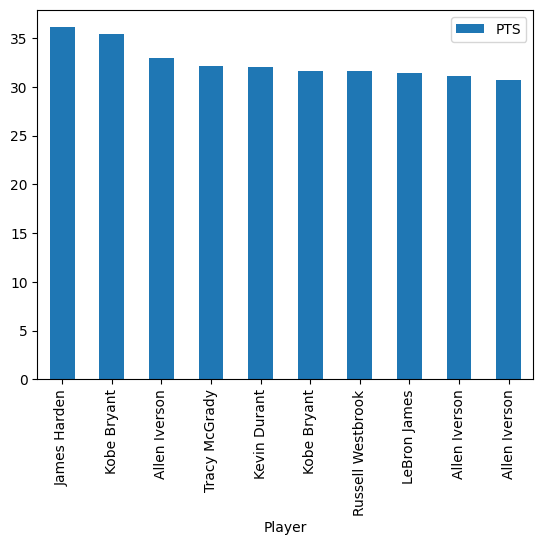

In [ ]:
final_combined_set.to_csv("player_mvp_stats.csv")
highest_scoring = final_combined_set[final_combined_set["G"] > 70].sort_values("PTS", ascending=False).head(10)
highest_scoring.plot.bar("Player", "PTS")

<Axes: xlabel='Year'>

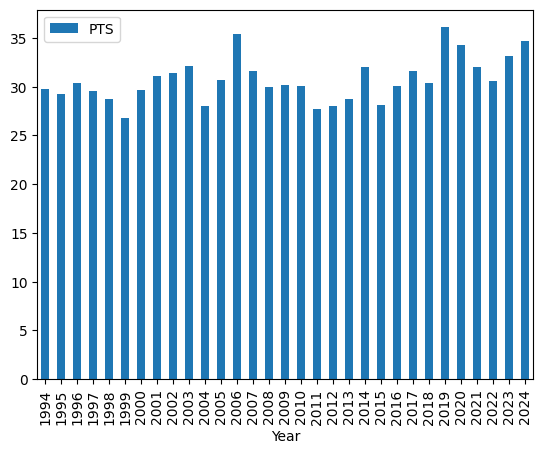

In [ ]:
highest_scoring_by_year = final_combined_set.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))
highest_scoring_by_year.plot.bar("Year", "PTS")

In [ ]:
final_combined_set.groupby("Year").apply(lambda x: x.shape[0])

,0
Year,
1994,403
1995,405
1996,428
1997,441
1998,439
1999,440
2000,439
2001,441
2002,440


In [ ]:
final_combined_set.dtypes

,0
Player,object
Pos,object
Age,int64
Tm,object
G,int64
GS,int64
MP,float64
FG,float64
FGA,float64
FG%,float64


In [ ]:
numeric_train = final_combined_set.select_dtypes(include=[float, int, bool])
numeric_train.corr()["Share"]

,Share
Age,0.017037
G,0.088606
GS,0.165747
MP,0.157873
FG,0.271736
FGA,0.243267
FG%,0.063782
3P,0.090844
3PA,0.090629
3P%,0.013629


In [ ]:
correlation_matrix = numeric_train.corr()["Share"]
correlation_df = correlation_matrix.reset_index()
correlation_df.columns = ["Variable", "Correlation"]
correlation_df.to_csv("correlation_heatmap_data.csv", index=False)

<Axes: >

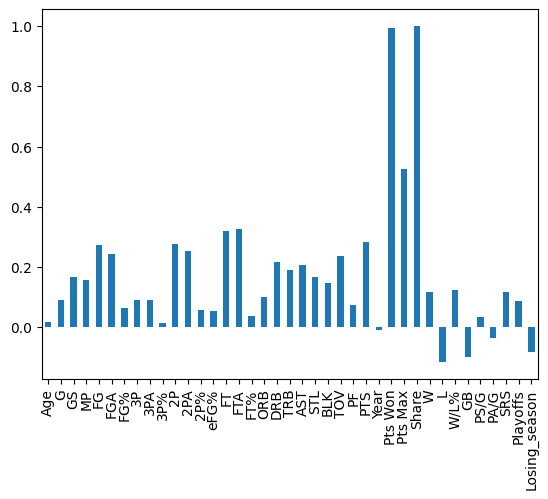

In [ ]:
numeric_train.corr()["Share"].plot.bar()

##Making the Model to Predict the MVP

In [ ]:
final_combined_set

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Playoffs,Losing_season
0,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,0.502,...,Phoenix Suns,56,26,0.683,7.0,108.2,103.4,4.68,True,False
1,Cedric Ceballos,SF,24,PHO,53,43,30.2,8.0,15.0,0.535,...,Phoenix Suns,56,26,0.683,7.0,108.2,103.4,4.68,True,False
2,Charles Barkley,PF,30,PHO,65,65,35.4,8.0,16.1,0.495,...,Phoenix Suns,56,26,0.683,7.0,108.2,103.4,4.68,True,False
3,Dan Majerle,SG,28,PHO,80,76,40.1,6.0,14.2,0.418,...,Phoenix Suns,56,26,0.683,7.0,108.2,103.4,4.68,True,False
4,Danny Ainge,SG,34,PHO,68,1,22.9,3.3,7.9,0.417,...,Phoenix Suns,56,26,0.683,7.0,108.2,103.4,4.68,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14642,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,...,Milwaukee Bucks,42,40,0.512,11.0,103.6,103.8,-0.45,True,False
14643,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,...,Milwaukee Bucks,42,40,0.512,11.0,103.6,103.8,-0.45,True,False
14644,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.470,...,Milwaukee Bucks,42,40,0.512,11.0,103.6,103.8,-0.45,True,False
14645,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,...,Milwaukee Bucks,42,40,0.512,11.0,103.6,103.8,-0.45,True,False


In [ ]:
pd.isnull(final_combined_set).sum()

,0
Player,0
Pos,0
Age,0
Tm,0
G,0
GS,0
MP,0
FG,0
FGA,0
FG%,59


In [ ]:
final_combined_set=final_combined_set.fillna(0)

In [ ]:
pd.isnull(final_combined_set).sum()

,0
Player,0
Pos,0
Age,0
Tm,0
G,0
GS,0
MP,0
FG,0
FGA,0
FG%,0


In [ ]:
final_combined_set.to_csv("combined_final.csv", index=False)

In [ ]:
final_combined_set.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS', 'Playoffs', 'Losing_season'],
      dtype='object')

In [ ]:
predictors = ["Age", "G", "GS", "MP", "FG", "FGA", 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'W', 'L', 'W/L%',
       'GB', 'PS/G', 'PA/G', 'SRS']
train = final_combined_set[~(final_combined_set["Year"] == 2024)]
test = final_combined_set[final_combined_set["Year"] == 2024]

In [ ]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [ ]:

reg.fit(train[predictors],train["Share"])

Ridge(alpha=0.1)

In [ ]:
predictions = reg.predict(test[predictors])
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
combination.sort_values("Share", ascending=False).head(20)

,Player,Share,predictions
726,Nikola Jokic,0.935,0.167455
1364,Shai Gilgeous-Alexander,0.646,0.164080
275,Luka Doncic,0.572,0.185703
165,Giannis Antetokounmpo,0.194,0.213749
3871,Jalen Brunson,0.143,0.099228
2951,Jayson Tatum,0.087,0.110243
8420,Anthony Edwards,0.018,0.087494
4270,Domantas Sabonis,0.003,0.096994
11888,Kevin Durant,0.001,0.101747
10059,Cade Cunningham,0.000,0.042467


##Evaluating Error Metrics

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(combination["Share"], combination["predictions"])

0.002475072496174441

In [ ]:
combination["Share"].value_counts()

,count
Share,
0.000,563
0.194,1
0.572,1
0.935,1
0.646,1
0.087,1
0.143,1
0.003,1
0.018,1


In [ ]:
actual = combination.sort_values("Share", ascending=False)
predicted = combination.sort_values("predictions", ascending=False)
actual["Rk"] = list(range(1,actual.shape[0]+1))
predicted["Predicted_Rk"] = list(range(1,predicted.shape[0]+1))

In [ ]:
actual.merge(predicted, on="Player").head()

,Player,Share_x,predictions_x,Rk,Share_y,predictions_y,Predicted_Rk
0,Nikola Jokic,0.935,0.167455,1,0.935,0.167455,4
1,Shai Gilgeous-Alexander,0.646,0.164080,2,0.646,0.164080,5
2,Luka Doncic,0.572,0.185703,3,0.572,0.185703,3
3,Giannis Antetokounmpo,0.194,0.213749,4,0.194,0.213749,1
4,Jalen Brunson,0.143,0.099228,5,0.143,0.099228,13


In [ ]:
from scipy.stats import spearmanr

# Calculating Spearman's Rank Correlation
spearman_corr, _ = spearmanr(actual["Rk"], predicted["Predicted_Rk"])
print(f"Spearman's Rank Correlation Coefficient: {spearman_corr}")

Spearman's Rank Correlation Coefficient: 1.0


In [ ]:
def find_ap(combination):
    actual = combination.sort_values("Share", ascending=False).head(5)
    predicted = combination.sort_values("predictions", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index,row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found += 1
            ps.append(found / seen)
        seen += 1

    return sum(ps) / len(ps)

In [ ]:
ap = find_ap(combination)
ap

0.7202564102564103

In [ ]:
years = list(range(1991,2022))
aps = []
all_predictions = []
for year in years[5:]:
    train = final_combined_set[final_combined_set["Year"] < year]
    test = final_combined_set[final_combined_set["Year"] == year]
    reg.fit(train[predictors],train["Share"])
    predictions = reg.predict(test[predictors])
    predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
    combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
    all_predictions.append(combination)
    aps.append(find_ap(combination))

In [ ]:
sum(aps) / len(aps)

0.6976920961140418

In [ ]:
def add_ranks(predictions):
    predictions = predictions.sort_values("predictions", ascending=False)
    predictions["Predicted_Rk"] = list(range(1,predictions.shape[0]+1))
    predictions = predictions.sort_values("Share", ascending=False)
    predictions["Rk"] = list(range(1,predictions.shape[0]+1))
    predictions["Diff"] = (predictions["Rk"] - predictions["Predicted_Rk"])
    return predictions

add_ranks(all_predictions[1])

,Player,Share,predictions,Predicted_Rk,Rk,Diff
1843,Karl Malone,0.857,0.183678,2,1,-1
11000,Michael Jordan,0.832,0.179493,3,2,-1
1048,Grant Hill,0.327,0.121682,8,3,-5
5141,Tim Hardaway,0.207,0.052840,30,4,-26
8792,Glen Rice,0.117,0.044148,40,5,-35
...,...,...,...,...,...,...
1705,Acie Earl,0.000,0.009659,154,437,283
2364,Don MacLean,0.000,0.009660,153,438,285
47,Ed O'Bannon,0.000,0.009746,152,439,287
9522,Jalen Rose,0.000,0.009777,151,440,289


In [ ]:
def backtest(stats, model, years, predictors):
    aps = []
    all_predictions = []
    for year in years:
        train = final_combined_set[final_combined_set["Year"] < year]
        test = final_combined_set[final_combined_set["Year"] == year]
        model.fit(train[predictors],train["Share"])
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
        combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_ap(combination))
    return sum(aps) / len(aps), aps, pd.concat(all_predictions)
mean_ap, aps, all_predictions = backtest(final_combined_set, reg, years[5:], predictors)
mean_ap

0.6976920961140418

In [ ]:
all_predictions[all_predictions["Rk"] < 5].sort_values("Diff").head(10)

,Player,Share,predictions,Predicted_Rk,Rk,Diff
1482,Jason Kidd,0.712,0.016871,90,2,-88
5582,Steve Nash,0.839,0.037295,42,1,-41
9060,Peja Stojakovic,0.228,0.032162,42,4,-38
13387,Joakim Noah,0.258,0.045879,39,4,-35
5600,Steve Nash,0.739,0.055728,32,1,-31
5141,Tim Hardaway,0.207,0.052840,30,4,-26
1415,Gary Payton,0.372,0.067379,18,3,-15
5615,Steve Nash,0.785,0.079023,16,2,-14
7807,Anfernee Hardaway,0.319,0.089121,17,3,-14
7241,Kobe Bryant,0.291,0.076829,15,4,-11


In [ ]:
pd.concat([pd.Series(reg.coef_), pd.Series(predictors)], axis=1).sort_values(0, ascending=False)

,0,1
13,0.063186,eFG%
18,0.035907,DRB
28,0.024113,W/L%
17,0.023943,ORB
10,0.018562,2P
15,0.012883,FTA
7,0.011637,3P
22,0.010798,BLK
21,0.009937,STL
5,0.009766,FGA


In [ ]:
# Step 1: Calculate stat ratios and reset the index
stat_ratios = final_combined_set[["PTS", "AST", "STL", "BLK", "3P", "Year"]].groupby("Year").apply(lambda x: x/x.mean()).reset_index(drop=True)

# Step 2: Assign the new ratio columns to the original DataFrame
final_combined_set[["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]] = stat_ratios[["PTS", "AST", "STL", "BLK", "3P"]]

# Step 3: Update predictors
predictors += ["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]

# Step 4: Perform backtesting
mean_ap, aps, all_predictions = backtest(final_combined_set, reg, years[5:], predictors)

# Check the result
mean_ap

0.6949214753380943

In [ ]:
final_combined_set.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PS/G,PA/G,SRS,Playoffs,Losing_season,PTS_R,AST_R,STL_R,BLK_R,3P_R
0,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,0.502,...,108.2,103.4,4.68,True,False,1.770767,0.851797,1.234513,1.131387,0.376284
1,Cedric Ceballos,SF,24,PHO,53,43,30.2,8.0,15.0,0.535,...,108.2,103.4,4.68,True,False,2.300792,0.851797,1.508850,0.905109,0.000000
2,Charles Barkley,PF,30,PHO,65,65,35.4,8.0,16.1,0.495,...,108.2,103.4,4.68,True,False,2.601943,2.304861,2.194690,1.357664,2.633987
3,Dan Majerle,SG,28,PHO,80,76,40.1,6.0,14.2,0.418,...,108.2,103.4,4.68,True,False,1.987595,1.703593,2.194690,1.131387,9.030812
4,Danny Ainge,SG,34,PHO,68,1,22.9,3.3,7.9,0.417,...,108.2,103.4,4.68,True,False,1.072097,1.302748,1.097345,0.226277,4.515406


In [ ]:
final_combined_set["NPos"] = final_combined_set["Pos"].astype("category").cat.codes
final_combined_set["NTm"] = final_combined_set["Tm"].astype("category").cat.codes

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50, random_state=1, min_samples_split=5)

mean_ap, aps, all_predictions = backtest(final_combined_set, rf, years[28:], predictors + ["NPos", "NTm"])
mean_ap

0.8200483091787439

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
def backtest(stats, model, years, predictors):
    aps = []
    all_predictions = []
    for year in years:
        train = stats[stats["Year"] < year].copy()
        test = stats[stats["Year"] == year].copy()
        sc.fit(train[predictors])
        train[predictors] = sc.transform(train[predictors])
        test[predictors] = sc.transform(test[predictors])
        model.fit(train[predictors],train["Share"])
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
        combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_ap(combination))
    return sum(aps) / len(aps), aps, pd.concat(all_predictions)

In [ ]:
mean_ap, aps, all_predictions = backtest(final_combined_set, reg, years[28:], predictors)
mean_ap

0.7583405483405482

In [ ]:
sc.transform(final_combined_set[predictors])

array([[ 0.74785887,  1.17243369,  1.01253122, ...,  0.34305251,
         0.11906954, -0.52276748],
       [-0.65001204,  0.01929603,  0.59928335, ...,  0.74336552,
        -0.07981197, -0.83981052],
       [ 0.74785887,  0.49645644,  1.35690445, ...,  1.74414806,
         0.31795105,  1.37949079],
       ...,
       [-0.41703356,  0.0590594 , -0.46827366, ..., -0.71796675,
        -0.65713192,  1.2197892 ],
       [-1.81490448,  0.1783495 ,  0.28934744, ..., -0.96476319,
        -0.22071978, -0.83981052],
       [-0.41703356,  1.09290696,  1.87346429, ..., -1.45835606,
        -0.87533799, -0.83981052]])

In [ ]:
sc = StandardScaler()

# Split the data into train and test sets (training on all years except 2024)
train = final_combined_set[final_combined_set["Year"] < 2024]
test = final_combined_set[final_combined_set["Year"] == 2024]

# Standardize the train and test data
sc.fit(train[predictors])
train[predictors] = sc.transform(train[predictors])
test[predictors] = sc.transform(test[predictors])

# Train the model on the training set
rf.fit(train[predictors], train["Share"])

# Make predictions for the test set (2024 data)
predictions = rf.predict(test[predictors])

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(predictions, columns=["predictions"], index=test.index)

# Combine the predictions with the actual test data
combination = pd.concat([test[["Player", "Share"]], predictions_df], axis=1)

<ipython-input-71-615393463992>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[predictors] = sc.transform(train[predictors])
<ipython-input-71-615393463992>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[predictors] = sc.transform(test[predictors])


In [ ]:
def backtest_and_save(stats, model, years, predictors, output_file):
    top_10_predictions = []
    sc = StandardScaler()

    # Start testing from the third year onward
    for year in years[2:]:
        train = stats[stats["Year"] < year].copy()
        test = stats[stats["Year"] == year].copy()

        # Skip if training or testing data is empty
        if train.empty or test.empty:
            print(f"Skipping year {year} due to insufficient data.")
            continue

        # Standardize the predictors
        sc.fit(train[predictors])
        train[predictors] = sc.transform(train[predictors])
        test[predictors] = sc.transform(test[predictors])

        # Train the model
        model.fit(train[predictors], train["Share"])

        # Make predictions for the test set
        predictions = model.predict(test[predictors])
        predictions_df = pd.DataFrame(predictions, columns=["predictions"], index=test.index)

        # Combine predictions with the actual data and include all columns
        combination = pd.concat([test, predictions_df], axis=1)

        # Sort by predicted MVP share and actual share, then get the top 10
        top_10_predicted = combination.sort_values("predictions", ascending=False).head(10)
        top_10_actual = combination.sort_values("Share", ascending=False).head(10)

        # Add year and ranks to the DataFrame
        top_10_predicted["Predicted_Rank"] = list(range(1, 11))
        top_10_actual["Actual_Rank"] = list(range(1, 11))

        # Merge the predicted and actual dataframes on "Player" and "Year"
        merged_top_10 = top_10_predicted.merge(top_10_actual[["Player", "Year", "Actual_Rank"]],
                                               on=["Player", "Year"], suffixes=("", "_Actual"))

        # Drop the 'predictions' column as it's no longer needed
        merged_top_10 = merged_top_10.drop(columns=["predictions"])

        # Append to the list of top 10 predictions
        top_10_predictions.append(merged_top_10)

    # Combine all years' top 10 predictions into one DataFrame
    top_10_predictions_df = pd.concat(top_10_predictions).reset_index(drop=True)

    # Save the result to a CSV file
    top_10_predictions_df.to_csv(output_file, index=False)

    return top_10_predictions_df

In [ ]:
"""predictors = ["Age", "G", "GS", "MP", "FG", "FGA", 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
              'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'W', 'L',
              'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS', "NPos", "NTm"]"""

# Sort the years in the dataset
years = sorted(final_combined_set["Year"].unique())

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=50, random_state=1, min_samples_split=5)

# File path to save the results
output_file = "top_10_mvp_candidates_predictions.csv"

# Run the backtest and save to CSV
top_10_mvp_comparison_all_years = backtest_and_save(final_combined_set, rf, years, predictors, output_file)

# Display the results
top_10_mvp_comparison_all_years.head(20)

,Player,Year,Predicted_Rank,Actual_Rank,Predicted_Share,Share,Player,Pos,Age,Tm,...,SRS,Playoffs,Losing_season,PTS_R,AST_R,STL_R,BLK_R,3P_R,NPos,NTm
0,Michael Jordan,1996,1,1,0.502210,0.986,Michael Jordan,SG,1.293406,CHI,...,2.430695,True,False,0.416629,0.275089,0.648065,0.000000,0.616157,1.573363,-1.195452
1,Shaquille O'Neal,1996,2,9,0.420350,0.056,Shaquille O'Neal,C,-1.105994,ORL,...,1.124421,True,False,0.243718,0.169712,0.000000,0.709576,0.000000,-1.220653,0.775632
2,Hakeem Olajuwon,1996,3,4,0.325973,0.211,Hakeem Olajuwon,C,1.560006,HOU,...,0.354944,True,False,0.513635,0.414426,0.165702,0.252064,0.868658,-1.220653,-0.538424
3,Karl Malone,1996,4,7,0.222056,0.075,Karl Malone,PF,1.293406,UTA,...,1.297911,True,False,0.163562,0.054957,0.278907,1.180742,0.000000,-0.754984,1.526521
4,Gary Payton,1996,5,6,0.112326,0.087,Gary Payton,PG,-0.039594,SEA,...,1.532632,True,False,0.593595,0.499651,0.507392,0.248264,0.637681,-0.056480,1.338799
5,David Robinson,1996,6,2,0.110203,0.508,David Robinson,C,0.760206,SAS,...,1.242802,True,False,0.047468,0.109275,0.639684,0.000000,0.000000,-1.220653,1.244938
6,Michael Jordan,1997,1,2,0.631035,0.832,Michael Jordan,SG,1.531073,CHI,...,2.193289,True,False,0.196061,0.220071,0.162016,0.000000,0.492926,1.594149,-1.210243
7,Karl Malone,1997,2,1,0.531956,0.857,Karl Malone,PF,1.531073,UTA,...,1.639181,True,False,1.534965,3.132574,1.952351,0.000000,2.511761,-0.754883,1.467862
8,Shaquille O'Neal,1997,3,10,0.223382,0.006,Shaquille O'Neal,C,-0.844332,LAL,...,0.764382,True,False,1.031553,0.695833,2.472078,3.519016,1.966059,-1.224690,-0.286758
9,Glen Rice,1997,4,5,0.149492,0.117,Glen Rice,SF,0.475337,CHH,...,0.453838,True,False,1.078232,1.928386,2.331891,0.471956,2.754147,0.654536,-1.302591


In [ ]:
def backtest__(stats, model, years, predictors, output_file):
    top_10_predictions = []
    sc = StandardScaler()

    # Start testing from the third year onward
    for year in years[2:]:
        train = stats[stats["Year"] < year].copy()
        test = stats[stats["Year"] == year].copy()

        # Skip if training or testing data is empty
        if train.empty or test.empty:
            print(f"Skipping year {year} due to insufficient data.")
            continue

        # Standardize the predictors only (keep original values intact)
        train_scaled = train.copy()
        test_scaled = test.copy()
        train_scaled[predictors] = sc.fit_transform(train[predictors])
        test_scaled[predictors] = sc.transform(test[predictors])

        # Train the model on the scaled data
        model.fit(train_scaled[predictors], train["Share"])

        # Make predictions for the test set
        predictions = model.predict(test_scaled[predictors])
        predictions_df = pd.DataFrame(predictions, columns=["Predicted_Share"], index=test.index)

        # Combine predictions with the original (unscaled) data
        combination = pd.concat([test, predictions_df], axis=1)

        # Sort by predicted MVP share and actual share, then get the top 10
        top_10_predicted = combination.sort_values("Predicted_Share", ascending=False).head(10)
        top_10_actual = combination.sort_values("Share", ascending=False).head(10)

        # Add ranks to the DataFrame
        top_10_predicted["Predicted_Rank"] = list(range(1, 11))
        top_10_actual["Actual_Rank"] = list(range(1, 11))

        # Merge the predicted and actual dataframes on "Player" and "Year"
        merged_top_10 = top_10_predicted.merge(top_10_actual[["Player", "Year", "Actual_Rank"]],
                                               on=["Player", "Year"], suffixes=("", "_Actual"))

        # Select the required columns
        final_columns = ['Player', 'Year', 'Predicted_Rank', 'Actual_Rank', 'Predicted_Share', 'Share'] + [col for col in final_combined_set.columns if col not in ['Share', 'Predicted_Share', 'Predicted_Rank', 'Actual_Rank']]

        # Reorder the columns for clarity
        merged_top_10 = merged_top_10[final_columns]

        # Append to the list of top 10 predictions
        top_10_predictions.append(merged_top_10)

    # Combine all years' top 10 predictions into one DataFrame
    top_10_predictions_df = pd.concat(top_10_predictions).reset_index(drop=True)

    # Save the result to a CSV file
    top_10_predictions_df.to_csv(output_file, index=False)

    return top_10_predictions_df



In [ ]:
years = sorted(final_combined_set["Year"].unique())

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=50, random_state=1, min_samples_split=5)

# File path to save the results
output_file = "top_10_mvp_candidates_predictions.csv"

# Run the backtest and save to CSV
top_10_mvp_comparison_all_years = backtest_and_save(final_combined_set, rf, years, predictors, output_file)

# Display the results
top_10_mvp_comparison_all_years.head(20)

,Player,Year,Predicted_Rank,Actual_Rank,Predicted_Share,Share,Player,Pos,Age,Tm,...,SRS,Playoffs,Losing_season,PTS_R,AST_R,STL_R,BLK_R,3P_R,NPos,NTm
0,Michael Jordan,1996,1,1,0.502210,0.986,Michael Jordan,SG,1.293406,CHI,...,2.430695,True,False,0.416629,0.275089,0.648065,0.000000,0.616157,1.573363,-1.195452
1,Shaquille O'Neal,1996,2,9,0.420350,0.056,Shaquille O'Neal,C,-1.105994,ORL,...,1.124421,True,False,0.243718,0.169712,0.000000,0.709576,0.000000,-1.220653,0.775632
2,Hakeem Olajuwon,1996,3,4,0.325973,0.211,Hakeem Olajuwon,C,1.560006,HOU,...,0.354944,True,False,0.513635,0.414426,0.165702,0.252064,0.868658,-1.220653,-0.538424
3,Karl Malone,1996,4,7,0.222056,0.075,Karl Malone,PF,1.293406,UTA,...,1.297911,True,False,0.163562,0.054957,0.278907,1.180742,0.000000,-0.754984,1.526521
4,Gary Payton,1996,5,6,0.112326,0.087,Gary Payton,PG,-0.039594,SEA,...,1.532632,True,False,0.593595,0.499651,0.507392,0.248264,0.637681,-0.056480,1.338799
5,David Robinson,1996,6,2,0.110203,0.508,David Robinson,C,0.760206,SAS,...,1.242802,True,False,0.047468,0.109275,0.639684,0.000000,0.000000,-1.220653,1.244938
6,Michael Jordan,1997,1,2,0.631035,0.832,Michael Jordan,SG,1.531073,CHI,...,2.193289,True,False,0.196061,0.220071,0.162016,0.000000,0.492926,1.594149,-1.210243
7,Karl Malone,1997,2,1,0.531956,0.857,Karl Malone,PF,1.531073,UTA,...,1.639181,True,False,1.534965,3.132574,1.952351,0.000000,2.511761,-0.754883,1.467862
8,Shaquille O'Neal,1997,3,10,0.223382,0.006,Shaquille O'Neal,C,-0.844332,LAL,...,0.764382,True,False,1.031553,0.695833,2.472078,3.519016,1.966059,-1.224690,-0.286758
9,Glen Rice,1997,4,5,0.149492,0.117,Glen Rice,SF,0.475337,CHH,...,0.453838,True,False,1.078232,1.928386,2.331891,0.471956,2.754147,0.654536,-1.302591


In [ ]:
final_combined_set

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,SRS,Playoffs,Losing_season,PTS_R,AST_R,STL_R,BLK_R,3P_R,NPos,NTm
0,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,0.502,...,4.68,True,False,1.770767,0.851797,1.234513,1.131387,0.376284,2,28
1,Cedric Ceballos,SF,24,PHO,53,43,30.2,8.0,15.0,0.535,...,4.68,True,False,2.300792,0.851797,1.508850,0.905109,0.000000,8,28
2,Charles Barkley,PF,30,PHO,65,65,35.4,8.0,16.1,0.495,...,4.68,True,False,2.601943,2.304861,2.194690,1.357664,2.633987,2,28
3,Dan Majerle,SG,28,PHO,80,76,40.1,6.0,14.2,0.418,...,4.68,True,False,1.987595,1.703593,2.194690,1.131387,9.030812,12,28
4,Danny Ainge,SG,34,PHO,68,1,22.9,3.3,7.9,0.417,...,4.68,True,False,1.072097,1.302748,1.097345,0.226277,4.515406,12,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14642,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,...,-0.45,True,False,1.448372,1.998602,1.522176,0.993056,2.550725,2,18
14643,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,...,-0.45,True,False,0.047488,0.000000,0.169131,0.000000,0.106280,2,18
14644,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.470,...,-0.45,True,False,0.949752,0.899371,0.507392,0.248264,2.444444,2,18
14645,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,...,-0.45,True,False,0.391773,0.499651,0.338261,0.744792,0.000000,0,18
